In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [17]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [80]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'

# 分類数設定

In [81]:
NUM_CLASSES = 22

# 学習データ読み込み

In [82]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [83]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [85]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [86]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_10 (Dropout)                 │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 22)                  │             242 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,312 (5.12 KB)

 Trainable params: 1,312 (5.12 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [88]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [89]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0665 - loss: 3.3453
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0660 - loss: 3.2374 - val_accuracy: 0.0620 - val_loss: 3.0959
Epoch 2/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0681 - loss: 3.1009 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0670 - loss: 3.0808 - val_accuracy: 0.0706 - val_loss: 3.0089
Epoch 3/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0886 - loss: 3.0187 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0861 - loss: 3.0058 - val_accuracy: 0.0997 - val_loss: 2.9395
Epoch 4/1000
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1035 - loss: 2.9537 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1063 - loss: 2.9358 - val_accuracy: 0.1680 - val_loss: 2.8672
Epoch 5/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1308 - loss: 2.8813 
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1471 - loss: 2.8705 - val_accuracy: 0.2567 - val_loss: 2.7758
Epoch 6/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2013 - loss: 2.8052 
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2257 - loss: 2.7772 - val_accuracy: 0.2991 - val_loss: 2.6634
Epoch 7/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2723 - loss: 2.6992 
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2825 - loss: 2.6522 - val_accuracy: 0.3305 - val_loss: 2.5051
Epoch 8/1000
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3079 - loss: 2.5590 
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3128 - loss: 2.5196 - val_accuracy: 0.3744 - val_loss: 2.3234
Epoch 9/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3130 - loss: 2.3995 
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3236 - loss: 2.3861 - val_accuracy: 0.3783 - val_loss: 2.1917
Epoch 10/1000
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3315 - loss: 2.3403 
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3338 - loss: 2.2998 - val_accuracy: 0.3870 - val_loss: 2.0814
Epoch 11/1000
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3338 - loss: 2.2593 
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3377 - loss: 2.2287 - val_accuracy: 0.3878 - val_loss: 1.9926
Epoch 12/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3454 - loss: 2.1520 
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3419 - loss: 2.1526 - val_accuracy: 0.3909 - val_loss: 1.9141
Epoch 13/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3419 - loss: 2.1017 
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3466 - loss: 2.0911 - val_accuracy: 0.3995 - val_loss: 1.8386
Epoch 14/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3339 - loss: 2.0941 
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3490 - loss: 2.0551 - val_accuracy: 0.4042 - val_loss: 1.7811
Epoch 15/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3680 - loss: 1.9601 
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3529 - loss: 1.9854 - val_accuracy: 0.4097 - val_loss: 1.7176
Epoch 16/1000
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3431 - loss: 1.9934 
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3471 - loss: 1.9649 - val_accuracy: 0.4239 - val_loss: 1.6716
Epoch 17/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3553 - loss: 1.9396 
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3573 - loss: 1.9206 - val_accuracy: 0.4419 - val_loss: 1.6231
Epoch 18/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3490 - loss: 1.9049 
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3654 - loss: 1.8704 - val_accuracy: 0.4482 - val_loss: 1.5794
Epoch 19/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3933 - loss: 1.8057 
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3809 - loss: 1.8278 - val_accuracy: 0.4647 - val_loss: 1.5410
Epoch 20/1000
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3611 - loss: 1.8507 
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3812 - loss: 1.8143 - val_accuracy: 0.4867 - val_loss: 1.5055
Epoch 21/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3844 - loss: 1.7962 
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3927 - loss: 1.7830 - val_accuracy: 0.5000 - val_loss: 1.4837
Epoch 22/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3986 - loss: 1.7665 
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3906 - loss: 1.7671 - val_accuracy: 0.5338 - val_loss: 1.4526
Epoch 23/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4171 - loss: 1.7383 
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4008 - loss: 1.7479 - val_accuracy: 0.5432 - val_loss: 1.4215
Epoch 24/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4095 - loss: 1.7119 
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4102 - loss: 1.7061 - val_accuracy: 0.5510 - val_loss: 1.3831
Epoch 25/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4153 - loss: 1.6826 
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4141 - loss: 1.6926 - val_accuracy: 0.5597 - val_loss: 1.3571
Epoch 26/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4097 - loss: 1.6888 
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4136 - loss: 1.6747 - val_accuracy: 0.5699 - val_loss: 1.3428
Epoch 27/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4102 - loss: 1.6723 
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4118 - loss: 1.6705 - val_accuracy: 0.5714 - val_loss: 1.3294
Epoch 28/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4006 - loss: 1.6625 
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4199 - loss: 1.6480 - val_accuracy: 0.5903 - val_loss: 1.3034
Epoch 29/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4326 - loss: 1.6219 
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4204 - loss: 1.6272 - val_accuracy: 0.6115 - val_loss: 1.2767
Epoch 30/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4302 - loss: 1.6153 
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4272 - loss: 1.6248 - val_accuracy: 0.6091 - val_loss: 1.2639
Epoch 31/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4233 - loss: 1.6199 
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4283 - loss: 1.6220 - val_accuracy: 0.6122 - val_loss: 1.2458
Epoch 32/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4406 - loss: 1.5732 
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4338 - loss: 1.5985 - val_accuracy: 0.6287 - val_loss: 1.2269
Epoch 33/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4549 - loss: 1.5619 
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4421 - loss: 1.5794 - val_accuracy: 0.6405 - val_loss: 1.2134
Epoch 34/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4455 - loss: 1.5821 
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4429 - loss: 1.5692 - val_accuracy: 0.6381 - val_loss: 1.1924
Epoch 35/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4300 - loss: 1.5965 
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4387 - loss: 1.5863 - val_accuracy: 0.6546 - val_loss: 1.1858
Epoch 36/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4319 - loss: 1.5915 
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4482 - loss: 1.5627 - val_accuracy: 0.6523 - val_loss: 1.1685
Epoch 37/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4388 - loss: 1.5651 
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4387 - loss: 1.5611 - val_accuracy: 0.6460 - val_loss: 1.1680
Epoch 38/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4594 - loss: 1.5309 
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4463 - loss: 1.5456 - val_accuracy: 0.6648 - val_loss: 1.1536
Epoch 39/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4479 - loss: 1.5605 
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4484 - loss: 1.5439 - val_accuracy: 0.6641 - val_loss: 1.1404
Epoch 40/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4662 - loss: 1.5134 
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4579 - loss: 1.5121 - val_accuracy: 0.6436 - val_loss: 1.1279
Epoch 41/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4542 - loss: 1.5387 
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4584 - loss: 1.5219 - val_accuracy: 0.6617 - val_loss: 1.1313
Epoch 42/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4645 - loss: 1.5050 
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4670 - loss: 1.5100 - val_accuracy: 0.6617 - val_loss: 1.1118
Epoch 43/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4579 - loss: 1.4939 
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4568 - loss: 1.5015 - val_accuracy: 0.6656 - val_loss: 1.1014
Epoch 44/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4622 - loss: 1.5221 
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4686 - loss: 1.4812 - val_accuracy: 0.6774 - val_loss: 1.0828
Epoch 45/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4602 - loss: 1.5089 
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4683 - loss: 1.4858 - val_accuracy: 0.6727 - val_loss: 1.0863
Epoch 46/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4709 - loss: 1.4432 
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4670 - loss: 1.4730 - val_accuracy: 0.6743 - val_loss: 1.0686
Epoch 47/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4855 - loss: 1.4479 
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4751 - loss: 1.4815 - val_accuracy: 0.6829 - val_loss: 1.0608
Epoch 48/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4709 - loss: 1.4777 
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4694 - loss: 1.4698 - val_accuracy: 0.6876 - val_loss: 1.0494
Epoch 49/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4736 - loss: 1.4612 
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4652 - loss: 1.4621 - val_accuracy: 0.6735 - val_loss: 1.0464
Epoch 50/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4782 - loss: 1.4307 
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4746 - loss: 1.4488 - val_accuracy: 0.6900 - val_loss: 1.0400
Epoch 51/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4766 - loss: 1.4129
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4699 - loss: 1.4570 - val_accuracy: 0.6907 - val_loss: 1.0362
Epoch 52/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5078 - loss: 1.3904
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4859 - loss: 1.4292 - val_accuracy: 0.7025 - val_loss: 1.0221
Epoch 53/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4453 - loss: 1.5998
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4717 - loss: 1.4314 - val_accuracy: 0.7198 - val_loss: 1.0106
Epoch 54/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5006 - loss: 1.4265 
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4864 - loss: 1.4458 - val_accuracy: 0.7057 - val_loss: 1.0108
Epoch 55/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4919 - loss: 1.4339 
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4961 - loss: 1.4219 - val_accuracy: 0.7111 - val_loss: 1.0062
Epoch 56/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5001 - loss: 1.3910 
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4987 - loss: 1.3868 - val_accuracy: 0.7111 - val_loss: 0.9889
Epoch 57/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4812 - loss: 1.4267 
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4864 - loss: 1.4174 - val_accuracy: 0.7182 - val_loss: 0.9837
Epoch 58/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4609 - loss: 1.4612
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4906 - loss: 1.3961 - val_accuracy: 0.7049 - val_loss: 0.9879
Epoch 59/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 1.3758 
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4990 - loss: 1.3860 - val_accuracy: 0.7331 - val_loss: 0.9717
Epoch 60/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4959 - loss: 1.3845 
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4895 - loss: 1.3916 - val_accuracy: 0.7316 - val_loss: 0.9748
Epoch 61/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4375 - loss: 1.5050
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4846 - loss: 1.4264 - val_accuracy: 0.7174 - val_loss: 0.9780
Epoch 62/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4922 - loss: 1.3634
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4898 - loss: 1.3847 - val_accuracy: 0.7190 - val_loss: 0.9725
Epoch 63/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5029 - loss: 1.3709 
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4877 - loss: 1.4031 - val_accuracy: 0.7622 - val_loss: 0.9612
Epoch 64/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5158 - loss: 1.3472 
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5024 - loss: 1.3902 - val_accuracy: 0.7221 - val_loss: 0.9549
Epoch 65/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5032 - loss: 1.3670 
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5165 - loss: 1.3602 - val_accuracy: 0.7645 - val_loss: 0.9412
Epoch 66/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5027 - loss: 1.3785 
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5092 - loss: 1.3617 - val_accuracy: 0.7527 - val_loss: 0.9502
Epoch 67/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5213 - loss: 1.3340 
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5042 - loss: 1.3536 - val_accuracy: 0.7582 - val_loss: 0.9423
Epoch 68/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4970 - loss: 1.3518 
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4984 - loss: 1.3538 - val_accuracy: 0.7370 - val_loss: 0.9349
Epoch 69/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5055 - loss: 1.3756 
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5060 - loss: 1.3587 - val_accuracy: 0.7308 - val_loss: 0.9320
Epoch 70/1000
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4876 - loss: 1.3578 
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4979 - loss: 1.3534 - val_accuracy: 0.7316 - val_loss: 0.9286
Epoch 71/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5176 - loss: 1.3045 
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5165 - loss: 1.3286 - val_accuracy: 0.7323 - val_loss: 0.9220
Epoch 72/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5041 - loss: 1.3558 
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5147 - loss: 1.3378 - val_accuracy: 0.7253 - val_loss: 0.9221
Epoch 73/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5248 - loss: 1.3178 
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5199 - loss: 1.3315 - val_accuracy: 0.7316 - val_loss: 0.9135
Epoch 74/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5091 - loss: 1.3382 
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5123 - loss: 1.3466 - val_accuracy: 0.7308 - val_loss: 0.9099
Epoch 75/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5321 - loss: 1.2986 
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5241 - loss: 1.3092 - val_accuracy: 0.7488 - val_loss: 0.9018
Epoch 76/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5200 - loss: 1.3269 
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5173 - loss: 1.3407 - val_accuracy: 0.7410 - val_loss: 0.9179
Epoch 77/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5274 - loss: 1.3456 
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5262 - loss: 1.3434 - val_accuracy: 0.7433 - val_loss: 0.8998
Epoch 78/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5107 - loss: 1.3365 
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5105 - loss: 1.3316 - val_accuracy: 0.7402 - val_loss: 0.8979
Epoch 79/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5302 - loss: 1.2887 
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5254 - loss: 1.3201 - val_accuracy: 0.7441 - val_loss: 0.8986
Epoch 80/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5304 - loss: 1.3041 
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5228 - loss: 1.3251 - val_accuracy: 0.7386 - val_loss: 0.9010
Epoch 81/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5249 - loss: 1.3242 
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5304 - loss: 1.3076 - val_accuracy: 0.7394 - val_loss: 0.8874
Epoch 82/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5106 - loss: 1.2999 
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5199 - loss: 1.3040 - val_accuracy: 0.7480 - val_loss: 0.8886
Epoch 83/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5267 - loss: 1.3097 
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5259 - loss: 1.3093 - val_accuracy: 0.7363 - val_loss: 0.8777
Epoch 84/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5308 - loss: 1.2822 
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5306 - loss: 1.2911 - val_accuracy: 0.7339 - val_loss: 0.8629
Epoch 85/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4453 - loss: 1.3974
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5445 - loss: 1.2658 - val_accuracy: 0.7504 - val_loss: 0.8671
Epoch 86/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5188 - loss: 1.3191 
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5330 - loss: 1.3049 - val_accuracy: 0.7323 - val_loss: 0.8660
Epoch 87/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5360 - loss: 1.2994 
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5283 - loss: 1.3128 - val_accuracy: 0.7457 - val_loss: 0.8672
Epoch 88/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5253 - loss: 1.3132 
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5293 - loss: 1.3139 - val_accuracy: 0.7402 - val_loss: 0.8855
Epoch 89/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5323 - loss: 1.2506 
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5346 - loss: 1.2648 - val_accuracy: 0.7614 - val_loss: 0.8661
Epoch 90/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5469 - loss: 1.3343
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5309 - loss: 1.2794 - val_accuracy: 0.7590 - val_loss: 0.8522
Epoch 91/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5547 - loss: 1.2108
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5262 - loss: 1.2766 - val_accuracy: 0.7653 - val_loss: 0.8615
Epoch 92/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4297 - loss: 1.4051
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5306 - loss: 1.2887 - val_accuracy: 0.7606 - val_loss: 0.8590
Epoch 93/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5383 - loss: 1.2767 
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5319 - loss: 1.2806 - val_accuracy: 0.7653 - val_loss: 0.8535
Epoch 94/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5251 - loss: 1.2894 
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5435 - loss: 1.2627 - val_accuracy: 0.7677 - val_loss: 0.8438
Epoch 95/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5338 - loss: 1.2732 
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5382 - loss: 1.2641 - val_accuracy: 0.7889 - val_loss: 0.8515
Epoch 96/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5000 - loss: 1.2696
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5317 - loss: 1.2870 - val_accuracy: 0.7700 - val_loss: 0.8431
Epoch 97/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5234 - loss: 1.2672
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5390 - loss: 1.3056 - val_accuracy: 0.7622 - val_loss: 0.8512
Epoch 98/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5703 - loss: 1.2480
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5390 - loss: 1.2567 - val_accuracy: 0.7786 - val_loss: 0.8379
Epoch 99/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5614 - loss: 1.2434 
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5503 - loss: 1.2508 - val_accuracy: 0.7810 - val_loss: 0.8419
Epoch 100/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5449 - loss: 1.3043 
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5419 - loss: 1.2804 - val_accuracy: 0.7653 - val_loss: 0.8410
Epoch 101/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5453 - loss: 1.2485 
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5427 - loss: 1.2552 - val_accuracy: 0.7559 - val_loss: 0.8354
Epoch 102/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5519 - loss: 1.2579 
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5455 - loss: 1.2494 - val_accuracy: 0.7841 - val_loss: 0.8274
Epoch 103/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5473 - loss: 1.2548 
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5482 - loss: 1.2594 - val_accuracy: 0.7732 - val_loss: 0.8307
Epoch 104/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5569 - loss: 1.2660 
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5542 - loss: 1.2385 - val_accuracy: 0.7834 - val_loss: 0.8292
Epoch 105/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5554 - loss: 1.2451 
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5560 - loss: 1.2509 - val_accuracy: 0.7810 - val_loss: 0.8226
Epoch 106/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5499 - loss: 1.2555 
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5474 - loss: 1.2488 - val_accuracy: 0.7810 - val_loss: 0.8272
Epoch 107/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5530 - loss: 1.2625 
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5542 - loss: 1.2667 - val_accuracy: 0.7763 - val_loss: 0.8253
Epoch 108/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5639 - loss: 1.2200 
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5455 - loss: 1.2483 - val_accuracy: 0.7724 - val_loss: 0.8272
Epoch 109/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5441 - loss: 1.2507 
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5503 - loss: 1.2453 - val_accuracy: 0.7724 - val_loss: 0.8191
Epoch 110/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5759 - loss: 1.2090 
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5634 - loss: 1.2241 - val_accuracy: 0.7802 - val_loss: 0.8185
Epoch 111/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5533 - loss: 1.2660 
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5576 - loss: 1.2574 - val_accuracy: 0.7975 - val_loss: 0.8203
Epoch 112/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5679 - loss: 1.2278 
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5686 - loss: 1.2210 - val_accuracy: 0.7794 - val_loss: 0.8053
Epoch 113/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5654 - loss: 1.2186 
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5542 - loss: 1.2254 - val_accuracy: 0.7700 - val_loss: 0.8026
Epoch 114/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5728 - loss: 1.2362 
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5641 - loss: 1.2330 - val_accuracy: 0.7810 - val_loss: 0.8076
Epoch 115/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5666 - loss: 1.2296 
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5620 - loss: 1.2192 - val_accuracy: 0.8014 - val_loss: 0.8081
Epoch 116/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5625 - loss: 1.2511
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5641 - loss: 1.2293 - val_accuracy: 0.7708 - val_loss: 0.7994
Epoch 117/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5556 - loss: 1.2442 
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5584 - loss: 1.2379 - val_accuracy: 0.7826 - val_loss: 0.7988
Epoch 118/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5567 - loss: 1.2147 
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5607 - loss: 1.2363 - val_accuracy: 0.7779 - val_loss: 0.8145
Epoch 119/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5470 - loss: 1.2531 
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5529 - loss: 1.2418 - val_accuracy: 0.7975 - val_loss: 0.8126
Epoch 120/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5621 - loss: 1.2488 
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5618 - loss: 1.2327 - val_accuracy: 0.7904 - val_loss: 0.7946
Epoch 121/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5732 - loss: 1.2245 
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5762 - loss: 1.2141 - val_accuracy: 0.8006 - val_loss: 0.7890
Epoch 122/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5386 - loss: 1.2709 
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5628 - loss: 1.2271 - val_accuracy: 0.8077 - val_loss: 0.7911
Epoch 123/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5566 - loss: 1.2230 
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5728 - loss: 1.1983 - val_accuracy: 0.7708 - val_loss: 0.7853
Epoch 124/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5753 - loss: 1.1659 
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5626 - loss: 1.2054 - val_accuracy: 0.8179 - val_loss: 0.7743
Epoch 125/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5588 - loss: 1.2184 
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5636 - loss: 1.1947 - val_accuracy: 0.8069 - val_loss: 0.7702
Epoch 126/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5501 - loss: 1.2134 
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5631 - loss: 1.1988 - val_accuracy: 0.7912 - val_loss: 0.7884
Epoch 127/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5636 - loss: 1.2313 
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5654 - loss: 1.2274 - val_accuracy: 0.7889 - val_loss: 0.7909
Epoch 128/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5697 - loss: 1.2409 
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5704 - loss: 1.2326 - val_accuracy: 0.8218 - val_loss: 0.7814
Epoch 129/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5842 - loss: 1.1627 
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5683 - loss: 1.1880 - val_accuracy: 0.8140 - val_loss: 0.7807
Epoch 130/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5617 - loss: 1.2147 
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5623 - loss: 1.2167 - val_accuracy: 0.7959 - val_loss: 0.7796
Epoch 131/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5735 - loss: 1.2343 
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5683 - loss: 1.2105 - val_accuracy: 0.8124 - val_loss: 0.7831
Epoch 132/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5667 - loss: 1.2075 
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5751 - loss: 1.1922 - val_accuracy: 0.8273 - val_loss: 0.7730
Epoch 133/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5805 - loss: 1.1643 
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5699 - loss: 1.2100 - val_accuracy: 0.8226 - val_loss: 0.7720
Epoch 134/1000
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5663 - loss: 1.1819 
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5696 - loss: 1.1971 - val_accuracy: 0.8187 - val_loss: 0.7757
Epoch 135/1000
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5694 - loss: 1.2015 
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5827 - loss: 1.1825 - val_accuracy: 0.7943 - val_loss: 0.7693
Epoch 136/1000
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5668 - loss: 1.2119 
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5691 - loss: 1.1909 - val_accuracy: 0.8093 - val_loss: 0.7584
Epoch 137/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5817 - loss: 1.1783 
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5840 - loss: 1.1726 - val_accuracy: 0.7959 - val_loss: 0.7601
Epoch 138/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5732 - loss: 1.1635 
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5757 - loss: 1.1969 - val_accuracy: 0.8336 - val_loss: 0.7596
Epoch 139/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5643 - loss: 1.2142 
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5715 - loss: 1.2039 - val_accuracy: 0.8061 - val_loss: 0.7760
Epoch 140/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5666 - loss: 1.2023 
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5699 - loss: 1.2039 - val_accuracy: 0.8116 - val_loss: 0.7683
Epoch 141/1000
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5834 - loss: 1.1716 
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5788 - loss: 1.1927 - val_accuracy: 0.8085 - val_loss: 0.7607
Epoch 142/1000
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5675 - loss: 1.2007 
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5662 - loss: 1.2032 - val_accuracy: 0.8124 - val_loss: 0.7557
Epoch 143/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5654 - loss: 1.1925 
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5785 - loss: 1.1624 - val_accuracy: 0.8171 - val_loss: 0.7470
Epoch 144/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5827 - loss: 1.1732 
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5848 - loss: 1.1732 - val_accuracy: 0.8061 - val_loss: 0.7501
Epoch 145/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5729 - loss: 1.1900 
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5699 - loss: 1.1964 - val_accuracy: 0.8077 - val_loss: 0.7485
Epoch 146/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5734 - loss: 1.1835 
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5709 - loss: 1.1800 - val_accuracy: 0.8140 - val_loss: 0.7695
Epoch 147/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5876 - loss: 1.1550 
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5877 - loss: 1.1560 - val_accuracy: 0.8116 - val_loss: 0.7486
Epoch 148/1000
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5975 - loss: 1.1298 
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5683 - loss: 1.1764 - val_accuracy: 0.8218 - val_loss: 0.7546
Epoch 149/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5588 - loss: 1.1970 
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5762 - loss: 1.1809 - val_accuracy: 0.8014 - val_loss: 0.7513
Epoch 150/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5843 - loss: 1.1220 
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5819 - loss: 1.1484 - val_accuracy: 0.8297 - val_loss: 0.7361
Epoch 151/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5793 - loss: 1.1506 
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5806 - loss: 1.1694 - val_accuracy: 0.8140 - val_loss: 0.7305
Epoch 152/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 1.1508 
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5880 - loss: 1.1600 - val_accuracy: 0.8375 - val_loss: 0.7334
Epoch 153/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5727 - loss: 1.2130 
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5751 - loss: 1.1900 - val_accuracy: 0.8116 - val_loss: 0.7497
Epoch 154/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5927 - loss: 1.1202 
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5880 - loss: 1.1542 - val_accuracy: 0.8320 - val_loss: 0.7391
Epoch 155/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5873 - loss: 1.1659 
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5830 - loss: 1.1731 - val_accuracy: 0.8265 - val_loss: 0.7425
Epoch 156/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5803 - loss: 1.1746 
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5804 - loss: 1.1739 - val_accuracy: 0.8226 - val_loss: 0.7406
Epoch 157/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5868 - loss: 1.1303 
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5715 - loss: 1.1654 - val_accuracy: 0.7991 - val_loss: 0.7508
Epoch 158/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5820 - loss: 1.1346 
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5757 - loss: 1.1649 - val_accuracy: 0.8155 - val_loss: 0.7389
Epoch 159/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5809 - loss: 1.1755 
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5974 - loss: 1.1473 - val_accuracy: 0.8218 - val_loss: 0.7400
Epoch 160/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5777 - loss: 1.1722 
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5801 - loss: 1.1596 - val_accuracy: 0.8203 - val_loss: 0.7354
Epoch 161/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5949 - loss: 1.1348 
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6031 - loss: 1.1268 - val_accuracy: 0.8336 - val_loss: 0.7257
Epoch 162/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5841 - loss: 1.1610 
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5866 - loss: 1.1618 - val_accuracy: 0.8116 - val_loss: 0.7294
Epoch 163/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5962 - loss: 1.1536 
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5903 - loss: 1.1456 - val_accuracy: 0.8171 - val_loss: 0.7205
Epoch 164/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5818 - loss: 1.2094 
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5843 - loss: 1.1741 - val_accuracy: 0.8226 - val_loss: 0.7316
Epoch 165/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5915 - loss: 1.1207 
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5887 - loss: 1.1464 - val_accuracy: 0.8273 - val_loss: 0.7316
Epoch 166/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5894 - loss: 1.1242 
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5801 - loss: 1.1462 - val_accuracy: 0.7975 - val_loss: 0.7383
Epoch 167/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5960 - loss: 1.1606 
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5990 - loss: 1.1424 - val_accuracy: 0.8344 - val_loss: 0.7261
Epoch 168/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6052 - loss: 1.1331 
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6037 - loss: 1.1411 - val_accuracy: 0.8516 - val_loss: 0.7219
Epoch 169/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5848 - loss: 1.1450 
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5793 - loss: 1.1517 - val_accuracy: 0.8030 - val_loss: 0.7319
Epoch 170/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5867 - loss: 1.1524 
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5974 - loss: 1.1275 - val_accuracy: 0.8524 - val_loss: 0.7061
Epoch 171/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5868 - loss: 1.1370 
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5791 - loss: 1.1558 - val_accuracy: 0.8469 - val_loss: 0.7168
Epoch 172/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6076 - loss: 1.1206 
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5971 - loss: 1.1264 - val_accuracy: 0.8218 - val_loss: 0.7231
Epoch 173/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5937 - loss: 1.1534 
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5958 - loss: 1.1482 - val_accuracy: 0.8069 - val_loss: 0.7232
Epoch 174/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5966 - loss: 1.1340 
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5961 - loss: 1.1308 - val_accuracy: 0.8203 - val_loss: 0.7103
Epoch 175/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5827 - loss: 1.1720 
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5880 - loss: 1.1588 - val_accuracy: 0.8305 - val_loss: 0.7180
Epoch 176/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5893 - loss: 1.1546 
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5908 - loss: 1.1377 - val_accuracy: 0.8289 - val_loss: 0.7291
Epoch 177/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5818 - loss: 1.1433 
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5846 - loss: 1.1262 - val_accuracy: 0.8320 - val_loss: 0.7017
Epoch 178/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5884 - loss: 1.1466 
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5969 - loss: 1.1276 - val_accuracy: 0.8454 - val_loss: 0.6996
Epoch 179/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6092 - loss: 1.1268 
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6045 - loss: 1.1238 - val_accuracy: 0.8344 - val_loss: 0.7077
Epoch 180/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5920 - loss: 1.1306 
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5958 - loss: 1.1152 - val_accuracy: 0.8375 - val_loss: 0.7028
Epoch 181/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5940 - loss: 1.1202 
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5919 - loss: 1.1457 - val_accuracy: 0.8148 - val_loss: 0.7025
Epoch 182/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6021 - loss: 1.1098 
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5927 - loss: 1.1154 - val_accuracy: 0.8383 - val_loss: 0.6911
Epoch 183/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5931 - loss: 1.1101 
Epoch 183: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5927 - loss: 1.1203 - val_accuracy: 0.8257 - val_loss: 0.7006
Epoch 184/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5938 - loss: 1.0303
Epoch 184: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5982 - loss: 1.1227 - val_accuracy: 0.8242 - val_loss: 0.7037
Epoch 185/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5974 - loss: 1.1219 
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6042 - loss: 1.1087 - val_accuracy: 0.8399 - val_loss: 0.6989
Epoch 186/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5925 - loss: 1.1184 
Epoch 186: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5979 - loss: 1.1229 - val_accuracy: 0.8093 - val_loss: 0.7211
Epoch 187/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5891 - loss: 1.1218 
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5969 - loss: 1.1133 - val_accuracy: 0.8195 - val_loss: 0.7051
Epoch 188/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6059 - loss: 1.1021 
Epoch 188: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5971 - loss: 1.1224 - val_accuracy: 0.8257 - val_loss: 0.7142
Epoch 189/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6101 - loss: 1.0993 
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5997 - loss: 1.1233 - val_accuracy: 0.8242 - val_loss: 0.7035
Epoch 190/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6053 - loss: 1.1167 
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5984 - loss: 1.1139 - val_accuracy: 0.8336 - val_loss: 0.6915
Epoch 191/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5967 - loss: 1.1399 
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6031 - loss: 1.1182 - val_accuracy: 0.8399 - val_loss: 0.6954
Epoch 192/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6121 - loss: 1.1069 
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6089 - loss: 1.1142 - val_accuracy: 0.8305 - val_loss: 0.7023
Epoch 193/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6128 - loss: 1.0586 
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6128 - loss: 1.0808 - val_accuracy: 0.8312 - val_loss: 0.6828
Epoch 194/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5876 - loss: 1.1170 
Epoch 194: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5927 - loss: 1.1242 - val_accuracy: 0.8399 - val_loss: 0.6850
Epoch 195/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5973 - loss: 1.1304 
Epoch 195: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6003 - loss: 1.1234 - val_accuracy: 0.8140 - val_loss: 0.7077
Epoch 196/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5821 - loss: 1.1442 
Epoch 196: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5953 - loss: 1.1291 - val_accuracy: 0.8446 - val_loss: 0.6879
Epoch 197/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6034 - loss: 1.0918 
Epoch 197: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5940 - loss: 1.1195 - val_accuracy: 0.8399 - val_loss: 0.7023
Epoch 198/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6045 - loss: 1.0886 
Epoch 198: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6010 - loss: 1.1011 - val_accuracy: 0.8391 - val_loss: 0.6872
Epoch 199/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6222 - loss: 1.0712 
Epoch 199: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6199 - loss: 1.0813 - val_accuracy: 0.8242 - val_loss: 0.6808
Epoch 200/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5954 - loss: 1.1091 
Epoch 200: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5984 - loss: 1.1066 - val_accuracy: 0.8328 - val_loss: 0.6891
Epoch 201/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5856 - loss: 1.1433 
Epoch 201: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5958 - loss: 1.1262 - val_accuracy: 0.8132 - val_loss: 0.7024
Epoch 202/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6013 - loss: 1.1138 
Epoch 202: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5969 - loss: 1.1367 - val_accuracy: 0.8234 - val_loss: 0.7044
Epoch 203/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5954 - loss: 1.1020 
Epoch 203: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6010 - loss: 1.0964 - val_accuracy: 0.8524 - val_loss: 0.6938
Epoch 204/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6141 - loss: 1.0800 
Epoch 204: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6134 - loss: 1.0911 - val_accuracy: 0.8399 - val_loss: 0.6981
Epoch 205/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6026 - loss: 1.0971 
Epoch 205: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6042 - loss: 1.1026 - val_accuracy: 0.8509 - val_loss: 0.6698
Epoch 206/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6078 - loss: 1.1145 
Epoch 206: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6089 - loss: 1.1065 - val_accuracy: 0.8312 - val_loss: 0.6850
Epoch 207/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6050 - loss: 1.0965 
Epoch 207: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6039 - loss: 1.1049 - val_accuracy: 0.8250 - val_loss: 0.6839
Epoch 208/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6039 - loss: 1.1300 
Epoch 208: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6186 - loss: 1.1132 - val_accuracy: 0.8312 - val_loss: 0.6904
Epoch 209/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6083 - loss: 1.0888 
Epoch 209: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6115 - loss: 1.0866 - val_accuracy: 0.8344 - val_loss: 0.6783
Epoch 210/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6056 - loss: 1.0792 
Epoch 210: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6139 - loss: 1.0750 - val_accuracy: 0.8352 - val_loss: 0.6687
Epoch 211/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6110 - loss: 1.0613 
Epoch 211: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6152 - loss: 1.0729 - val_accuracy: 0.8430 - val_loss: 0.6713
Epoch 212/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6206 - loss: 1.0734 
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6144 - loss: 1.0829 - val_accuracy: 0.8352 - val_loss: 0.6709
Epoch 213/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6132 - loss: 1.0645 
Epoch 213: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6149 - loss: 1.0788 - val_accuracy: 0.8359 - val_loss: 0.6725
Epoch 214/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6174 - loss: 1.0643 
Epoch 214: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6141 - loss: 1.0994 - val_accuracy: 0.8501 - val_loss: 0.6749
Epoch 215/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6010 - loss: 1.1074 
Epoch 215: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6021 - loss: 1.0940 - val_accuracy: 0.8430 - val_loss: 0.6673
Epoch 216/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6083 - loss: 1.0876 
Epoch 216: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6113 - loss: 1.0855 - val_accuracy: 0.8454 - val_loss: 0.6715
Epoch 217/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6137 - loss: 1.1321 
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6191 - loss: 1.0987 - val_accuracy: 0.8438 - val_loss: 0.6742
Epoch 218/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5625 - loss: 1.1998
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6068 - loss: 1.0968 - val_accuracy: 0.8414 - val_loss: 0.6660
Epoch 219/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6156 - loss: 1.0546 
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6228 - loss: 1.0559 - val_accuracy: 0.8383 - val_loss: 0.6723
Epoch 220/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6094 - loss: 1.0840
Epoch 220: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6071 - loss: 1.0938 - val_accuracy: 0.8328 - val_loss: 0.6724
Epoch 221/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6282 - loss: 1.0492 
Epoch 221: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6225 - loss: 1.0619 - val_accuracy: 0.8359 - val_loss: 0.6694
Epoch 222/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6196 - loss: 1.0855 
Epoch 222: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6249 - loss: 1.0662 - val_accuracy: 0.8352 - val_loss: 0.6646
Epoch 223/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6150 - loss: 1.0778 
Epoch 223: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6092 - loss: 1.0952 - val_accuracy: 0.8422 - val_loss: 0.6771
Epoch 224/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6239 - loss: 1.0865 
Epoch 224: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6225 - loss: 1.0732 - val_accuracy: 0.8414 - val_loss: 0.6605
Epoch 225/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6180 - loss: 1.0634 
Epoch 225: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6202 - loss: 1.0516 - val_accuracy: 0.8571 - val_loss: 0.6626
Epoch 226/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6153 - loss: 1.0646 
Epoch 226: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6097 - loss: 1.0660 - val_accuracy: 0.8375 - val_loss: 0.6635
Epoch 227/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 1.0625 
Epoch 227: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6110 - loss: 1.0791 - val_accuracy: 0.8469 - val_loss: 0.6763
Epoch 228/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6087 - loss: 1.1181 
Epoch 228: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6107 - loss: 1.1001 - val_accuracy: 0.8336 - val_loss: 0.6762
Epoch 229/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6218 - loss: 1.0735 
Epoch 229: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6277 - loss: 1.0710 - val_accuracy: 0.8485 - val_loss: 0.6624
Epoch 230/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6017 - loss: 1.0963 
Epoch 230: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6178 - loss: 1.0812 - val_accuracy: 0.8477 - val_loss: 0.6627
Epoch 231/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5975 - loss: 1.1238 
Epoch 231: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6105 - loss: 1.0881 - val_accuracy: 0.8524 - val_loss: 0.6490
Epoch 232/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6213 - loss: 1.0703 
Epoch 232: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6165 - loss: 1.0608 - val_accuracy: 0.8367 - val_loss: 0.6661
Epoch 233/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6406 - loss: 1.1341
Epoch 233: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6199 - loss: 1.0821 - val_accuracy: 0.8516 - val_loss: 0.6536
Epoch 234/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6237 - loss: 1.0898 
Epoch 234: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6194 - loss: 1.0779 - val_accuracy: 0.8367 - val_loss: 0.6750
Epoch 235/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6296 - loss: 1.0413 
Epoch 235: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6236 - loss: 1.0630 - val_accuracy: 0.8226 - val_loss: 0.6613
Epoch 236/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6030 - loss: 1.1210 
Epoch 236: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6081 - loss: 1.0898 - val_accuracy: 0.8469 - val_loss: 0.6590
Epoch 237/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6448 - loss: 1.0405 
Epoch 237: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6283 - loss: 1.0710 - val_accuracy: 0.8485 - val_loss: 0.6626
Epoch 238/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5859 - loss: 1.1041
Epoch 238: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6228 - loss: 1.0504 - val_accuracy: 0.8485 - val_loss: 0.6461
Epoch 239/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6191 - loss: 1.0599 
Epoch 239: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6188 - loss: 1.0587 - val_accuracy: 0.8430 - val_loss: 0.6485
Epoch 240/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6157 - loss: 1.0707 
Epoch 240: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6165 - loss: 1.0666 - val_accuracy: 0.8367 - val_loss: 0.6556
Epoch 241/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6562 - loss: 1.0732
Epoch 241: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6183 - loss: 1.0640 - val_accuracy: 0.8297 - val_loss: 0.6553
Epoch 242/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6131 - loss: 1.0559 
Epoch 242: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6251 - loss: 1.0546 - val_accuracy: 0.8548 - val_loss: 0.6374
Epoch 243/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6041 - loss: 1.1086 
Epoch 243: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6073 - loss: 1.0816 - val_accuracy: 0.8407 - val_loss: 0.6566
Epoch 244/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6417 - loss: 1.0686 
Epoch 244: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6372 - loss: 1.0595 - val_accuracy: 0.8328 - val_loss: 0.6644
Epoch 245/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6187 - loss: 1.0565 
Epoch 245: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6202 - loss: 1.0557 - val_accuracy: 0.8493 - val_loss: 0.6503
Epoch 246/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6163 - loss: 1.0645 
Epoch 246: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6110 - loss: 1.0783 - val_accuracy: 0.8516 - val_loss: 0.6535
Epoch 247/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6207 - loss: 1.0311 
Epoch 247: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6246 - loss: 1.0366 - val_accuracy: 0.8250 - val_loss: 0.6557
Epoch 248/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6238 - loss: 1.1012 
Epoch 248: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6181 - loss: 1.0725 - val_accuracy: 0.8336 - val_loss: 0.6541
Epoch 249/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6229 - loss: 1.0646 
Epoch 249: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6228 - loss: 1.0675 - val_accuracy: 0.8344 - val_loss: 0.6652
Epoch 250/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6012 - loss: 1.0731 
Epoch 250: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6128 - loss: 1.0613 - val_accuracy: 0.8391 - val_loss: 0.6655
Epoch 251/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6247 - loss: 1.0389 
Epoch 251: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6202 - loss: 1.0451 - val_accuracy: 0.8430 - val_loss: 0.6622
Epoch 252/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6254 - loss: 1.0469 
Epoch 252: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6139 - loss: 1.0715 - val_accuracy: 0.8462 - val_loss: 0.6596
Epoch 253/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6089 - loss: 1.0564 
Epoch 253: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6223 - loss: 1.0521 - val_accuracy: 0.8367 - val_loss: 0.6484
Epoch 254/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6259 - loss: 1.0724 
Epoch 254: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6319 - loss: 1.0522 - val_accuracy: 0.8320 - val_loss: 0.6501
Epoch 255/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6341 - loss: 1.0063 
Epoch 255: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6225 - loss: 1.0348 - val_accuracy: 0.8344 - val_loss: 0.6483
Epoch 256/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6318 - loss: 1.0458 
Epoch 256: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6233 - loss: 1.0567 - val_accuracy: 0.8407 - val_loss: 0.6483
Epoch 257/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6244 - loss: 1.0449 
Epoch 257: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6186 - loss: 1.0558 - val_accuracy: 0.8422 - val_loss: 0.6524
Epoch 258/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6181 - loss: 1.0709 
Epoch 258: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6254 - loss: 1.0579 - val_accuracy: 0.8273 - val_loss: 0.6585
Epoch 259/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6115 - loss: 1.0585 
Epoch 259: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6178 - loss: 1.0415 - val_accuracy: 0.8297 - val_loss: 0.6636
Epoch 260/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6279 - loss: 1.0479 
Epoch 260: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6270 - loss: 1.0478 - val_accuracy: 0.8265 - val_loss: 0.6457
Epoch 261/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5904 - loss: 1.0834 
Epoch 261: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6162 - loss: 1.0517 - val_accuracy: 0.8140 - val_loss: 0.6565
Epoch 262/1000
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6193 - loss: 1.0531 
Epoch 262: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6285 - loss: 1.0442 - val_accuracy: 0.8454 - val_loss: 0.6325
Epoch 263/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6177 - loss: 1.0546 
Epoch 263: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6175 - loss: 1.0704 - val_accuracy: 0.8407 - val_loss: 0.6440
Epoch 264/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6331 - loss: 1.0082 
Epoch 264: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6254 - loss: 1.0472 - val_accuracy: 0.8312 - val_loss: 0.6528
Epoch 265/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6465 - loss: 1.0172 
Epoch 265: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6338 - loss: 1.0438 - val_accuracy: 0.8501 - val_loss: 0.6363
Epoch 266/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6138 - loss: 1.0536 
Epoch 266: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6272 - loss: 1.0471 - val_accuracy: 0.8344 - val_loss: 0.6316
Epoch 267/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6105 - loss: 1.0517 
Epoch 267: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6147 - loss: 1.0480 - val_accuracy: 0.8391 - val_loss: 0.6381
Epoch 268/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6303 - loss: 1.0532 
Epoch 268: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6267 - loss: 1.0446 - val_accuracy: 0.8399 - val_loss: 0.6438
Epoch 269/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6097 - loss: 1.0521 
Epoch 269: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6141 - loss: 1.0513 - val_accuracy: 0.8187 - val_loss: 0.6565
Epoch 270/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6375 - loss: 1.0070 
Epoch 270: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6317 - loss: 1.0198 - val_accuracy: 0.8328 - val_loss: 0.6427
Epoch 271/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6140 - loss: 1.0675 
Epoch 271: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6178 - loss: 1.0490 - val_accuracy: 0.8069 - val_loss: 0.6469
Epoch 272/1000
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6173 - loss: 1.0754 
Epoch 272: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6251 - loss: 1.0648 - val_accuracy: 0.8485 - val_loss: 0.6367
Epoch 273/1000
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6238 - loss: 1.0190 
Epoch 273: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6215 - loss: 1.0275 - val_accuracy: 0.8273 - val_loss: 0.6382
Epoch 274/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6494 - loss: 1.0096 
Epoch 274: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6288 - loss: 1.0450 - val_accuracy: 0.8477 - val_loss: 0.6507
Epoch 275/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6155 - loss: 1.0423 
Epoch 275: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6296 - loss: 1.0284 - val_accuracy: 0.8430 - val_loss: 0.6276
Epoch 276/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6243 - loss: 1.0380 
Epoch 276: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6243 - loss: 1.0454 - val_accuracy: 0.8336 - val_loss: 0.6477
Epoch 277/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6315 - loss: 1.0295 
Epoch 277: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6264 - loss: 1.0559 - val_accuracy: 0.8493 - val_loss: 0.6378
Epoch 278/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6467 - loss: 1.0044 
Epoch 278: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6338 - loss: 1.0282 - val_accuracy: 0.8399 - val_loss: 0.6340
Epoch 279/1000
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6254 - loss: 1.0809 
Epoch 279: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6343 - loss: 1.0294 - val_accuracy: 0.8462 - val_loss: 0.6263
Epoch 280/1000
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6230 - loss: 1.0721 
Epoch 280: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6262 - loss: 1.0588 - val_accuracy: 0.8438 - val_loss: 0.6417
Epoch 281/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6299 - loss: 1.0262 
Epoch 281: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6309 - loss: 1.0134 - val_accuracy: 0.8564 - val_loss: 0.6169
Epoch 282/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6188 - loss: 1.0471 
Epoch 282: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6304 - loss: 1.0327 - val_accuracy: 0.8532 - val_loss: 0.6371
Epoch 283/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6303 - loss: 1.0326 
Epoch 283: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6228 - loss: 1.0446 - val_accuracy: 0.8234 - val_loss: 0.6504
Epoch 284/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6253 - loss: 1.0561 
Epoch 284: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6188 - loss: 1.0676 - val_accuracy: 0.8391 - val_loss: 0.6558
Epoch 285/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6375 - loss: 1.0423 
Epoch 285: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6267 - loss: 1.0585 - val_accuracy: 0.8501 - val_loss: 0.6496
Epoch 286/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6015 - loss: 1.0824 
Epoch 286: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6194 - loss: 1.0575 - val_accuracy: 0.8328 - val_loss: 0.6421
Epoch 287/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6262 - loss: 1.0726 
Epoch 287: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6319 - loss: 1.0420 - val_accuracy: 0.8516 - val_loss: 0.6330
Epoch 288/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6342 - loss: 1.0111 
Epoch 288: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6293 - loss: 1.0426 - val_accuracy: 0.8430 - val_loss: 0.6379
Epoch 289/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6467 - loss: 0.9997 
Epoch 289: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6353 - loss: 1.0285 - val_accuracy: 0.8242 - val_loss: 0.6468
Epoch 290/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6426 - loss: 0.9879 
Epoch 290: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6340 - loss: 1.0265 - val_accuracy: 0.8414 - val_loss: 0.6265
Epoch 291/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6172 - loss: 1.0571 
Epoch 291: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6340 - loss: 1.0210 - val_accuracy: 0.8516 - val_loss: 0.6334
Epoch 292/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6182 - loss: 1.0504 
Epoch 292: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6228 - loss: 1.0412 - val_accuracy: 0.8399 - val_loss: 0.6285
Epoch 293/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6308 - loss: 1.0208 
Epoch 293: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6306 - loss: 1.0249 - val_accuracy: 0.8367 - val_loss: 0.6400
Epoch 294/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6237 - loss: 1.0657 
Epoch 294: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6285 - loss: 1.0346 - val_accuracy: 0.8407 - val_loss: 0.6401
Epoch 295/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6327 - loss: 1.0463 
Epoch 295: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6293 - loss: 1.0666 - val_accuracy: 0.8305 - val_loss: 0.6469
Epoch 296/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6251 - loss: 1.0412 
Epoch 296: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6372 - loss: 1.0152 - val_accuracy: 0.8399 - val_loss: 0.6251
Epoch 297/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6384 - loss: 1.0133 
Epoch 297: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6325 - loss: 1.0225 - val_accuracy: 0.8210 - val_loss: 0.6425
Epoch 298/1000
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6243 - loss: 1.0403 
Epoch 298: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6264 - loss: 1.0245 - val_accuracy: 0.8289 - val_loss: 0.6298
Epoch 299/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6310 - loss: 1.0259 
Epoch 299: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6348 - loss: 1.0147 - val_accuracy: 0.8454 - val_loss: 0.6134
Epoch 300/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6319 - loss: 1.0412 
Epoch 300: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6332 - loss: 1.0263 - val_accuracy: 0.8462 - val_loss: 0.6281
Epoch 301/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6396 - loss: 1.0315 
Epoch 301: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6319 - loss: 1.0377 - val_accuracy: 0.8422 - val_loss: 0.6230
Epoch 302/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6562 - loss: 1.1217
Epoch 302: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6469 - loss: 1.0003 - val_accuracy: 0.8250 - val_loss: 0.6267
Epoch 303/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6223 - loss: 1.0455 
Epoch 303: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6366 - loss: 1.0166 - val_accuracy: 0.8195 - val_loss: 0.6282
Epoch 304/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6455 - loss: 1.0358 
Epoch 304: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6463 - loss: 1.0120 - val_accuracy: 0.8391 - val_loss: 0.6182
Epoch 305/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6296 - loss: 1.0243 
Epoch 305: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6348 - loss: 1.0193 - val_accuracy: 0.8367 - val_loss: 0.6157
Epoch 306/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6406 - loss: 0.9389
Epoch 306: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6385 - loss: 1.0170 - val_accuracy: 0.8328 - val_loss: 0.6262
Epoch 307/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6284 - loss: 1.0433 
Epoch 307: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6330 - loss: 1.0328 - val_accuracy: 0.8242 - val_loss: 0.6352
Epoch 308/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6424 - loss: 1.0044 
Epoch 308: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6385 - loss: 0.9997 - val_accuracy: 0.8430 - val_loss: 0.6317
Epoch 309/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6279 - loss: 1.0400 
Epoch 309: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6251 - loss: 1.0317 - val_accuracy: 0.8454 - val_loss: 0.6336
Epoch 310/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6450 - loss: 0.9906 
Epoch 310: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6435 - loss: 0.9929 - val_accuracy: 0.8493 - val_loss: 0.6087
Epoch 311/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6436 - loss: 1.0068 
Epoch 311: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6393 - loss: 1.0097 - val_accuracy: 0.8407 - val_loss: 0.6226
Epoch 312/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6380 - loss: 0.9915 
Epoch 312: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6474 - loss: 1.0017 - val_accuracy: 0.8469 - val_loss: 0.6181
Epoch 313/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6298 - loss: 1.0259 
Epoch 313: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6343 - loss: 1.0304 - val_accuracy: 0.8501 - val_loss: 0.6166
Epoch 314/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6195 - loss: 1.0268 
Epoch 314: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6249 - loss: 1.0436 - val_accuracy: 0.8195 - val_loss: 0.6420
Epoch 315/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6482 - loss: 1.0015 
Epoch 315: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6421 - loss: 0.9977 - val_accuracy: 0.8399 - val_loss: 0.6271
Epoch 316/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6353 - loss: 1.0215 
Epoch 316: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6466 - loss: 1.0098 - val_accuracy: 0.8195 - val_loss: 0.6296
Epoch 317/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6549 - loss: 0.9987 
Epoch 317: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6508 - loss: 1.0028 - val_accuracy: 0.8414 - val_loss: 0.6112
Epoch 318/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6382 - loss: 1.0059 
Epoch 318: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6395 - loss: 1.0106 - val_accuracy: 0.8359 - val_loss: 0.6099
Epoch 319/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6411 - loss: 0.9994 
Epoch 319: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6372 - loss: 1.0098 - val_accuracy: 0.8305 - val_loss: 0.6229
Epoch 320/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6558 - loss: 0.9882 
Epoch 320: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6411 - loss: 1.0074 - val_accuracy: 0.8399 - val_loss: 0.6331
Epoch 321/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6209 - loss: 1.0257 
Epoch 321: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6327 - loss: 1.0138 - val_accuracy: 0.8485 - val_loss: 0.6236
Epoch 322/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6376 - loss: 1.0312 
Epoch 322: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6487 - loss: 0.9939 - val_accuracy: 0.8375 - val_loss: 0.6052
Epoch 323/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6406 - loss: 1.0490
Epoch 323: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6469 - loss: 1.0280 - val_accuracy: 0.8430 - val_loss: 0.6172
Epoch 324/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6504 - loss: 1.0071 
Epoch 324: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6408 - loss: 1.0251 - val_accuracy: 0.8532 - val_loss: 0.6096
Epoch 325/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6334 - loss: 1.0250 
Epoch 325: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6442 - loss: 1.0036 - val_accuracy: 0.8383 - val_loss: 0.6266
Epoch 326/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6376 - loss: 1.0028 
Epoch 326: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6366 - loss: 1.0008 - val_accuracy: 0.8100 - val_loss: 0.6286
Epoch 327/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6342 - loss: 1.0645 
Epoch 327: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6385 - loss: 1.0393 - val_accuracy: 0.8430 - val_loss: 0.6297
Epoch 328/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6425 - loss: 1.0171 
Epoch 328: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6385 - loss: 1.0150 - val_accuracy: 0.8257 - val_loss: 0.6219
Epoch 329/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6562 - loss: 0.9466
Epoch 329: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6387 - loss: 1.0182 - val_accuracy: 0.8210 - val_loss: 0.6308
Epoch 330/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6953 - loss: 0.9116
Epoch 330: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6440 - loss: 1.0139 - val_accuracy: 0.8383 - val_loss: 0.6191
Epoch 331/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6415 - loss: 1.0169 
Epoch 331: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6348 - loss: 1.0408 - val_accuracy: 0.8399 - val_loss: 0.6303
Epoch 332/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6328 - loss: 1.0427
Epoch 332: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6492 - loss: 0.9962 - val_accuracy: 0.8352 - val_loss: 0.6146
Epoch 333/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6953 - loss: 0.9027
Epoch 333: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6437 - loss: 0.9955 - val_accuracy: 0.8320 - val_loss: 0.6197
Epoch 334/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5938 - loss: 0.9618
Epoch 334: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6524 - loss: 0.9904 - val_accuracy: 0.8485 - val_loss: 0.6033
Epoch 335/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6330 - loss: 1.0270 
Epoch 335: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6319 - loss: 1.0299 - val_accuracy: 0.8352 - val_loss: 0.6160
Epoch 336/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6285 - loss: 1.0425 
Epoch 336: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6479 - loss: 0.9983 - val_accuracy: 0.8540 - val_loss: 0.6140
Epoch 337/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6364 - loss: 1.0125 
Epoch 337: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6317 - loss: 1.0230 - val_accuracy: 0.8312 - val_loss: 0.6222
Epoch 338/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6390 - loss: 0.9956 
Epoch 338: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6395 - loss: 0.9971 - val_accuracy: 0.8469 - val_loss: 0.6078
Epoch 339/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6409 - loss: 1.0083 
Epoch 339: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6445 - loss: 0.9992 - val_accuracy: 0.8477 - val_loss: 0.5986
Epoch 340/1000
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6559 - loss: 0.9817 
Epoch 340: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6539 - loss: 0.9950 - val_accuracy: 0.8234 - val_loss: 0.6070
Epoch 341/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6589 - loss: 0.9918 
Epoch 341: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6563 - loss: 0.9800 - val_accuracy: 0.8359 - val_loss: 0.6022
Epoch 342/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6561 - loss: 0.9708 
Epoch 342: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6490 - loss: 0.9805 - val_accuracy: 0.8564 - val_loss: 0.5936
Epoch 343/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6519 - loss: 1.0074 
Epoch 343: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6461 - loss: 1.0048 - val_accuracy: 0.8242 - val_loss: 0.6162
Epoch 344/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6579 - loss: 0.9921 
Epoch 344: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6437 - loss: 1.0028 - val_accuracy: 0.8556 - val_loss: 0.6118
Epoch 345/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6349 - loss: 1.0057 
Epoch 345: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6327 - loss: 1.0094 - val_accuracy: 0.8469 - val_loss: 0.6251
Epoch 346/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6589 - loss: 0.9766 
Epoch 346: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6510 - loss: 0.9763 - val_accuracy: 0.8375 - val_loss: 0.6313
Epoch 347/1000
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6534 - loss: 0.9769 
Epoch 347: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6565 - loss: 0.9753 - val_accuracy: 0.8359 - val_loss: 0.6130
Epoch 348/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6371 - loss: 1.0444 
Epoch 348: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6479 - loss: 0.9985 - val_accuracy: 0.8391 - val_loss: 0.6192
Epoch 349/1000
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6596 - loss: 1.0125 
Epoch 349: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6492 - loss: 0.9944 - val_accuracy: 0.8305 - val_loss: 0.6117
Epoch 350/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6404 - loss: 1.0398 
Epoch 350: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6474 - loss: 1.0069 - val_accuracy: 0.8305 - val_loss: 0.6159
Epoch 351/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6499 - loss: 0.9838 
Epoch 351: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6466 - loss: 0.9957 - val_accuracy: 0.8438 - val_loss: 0.6154
Epoch 352/1000
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6305 - loss: 0.9898 
Epoch 352: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6372 - loss: 0.9981 - val_accuracy: 0.8430 - val_loss: 0.6166
Epoch 353/1000
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - loss: 1.0029 
Epoch 353: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6445 - loss: 1.0002 - val_accuracy: 0.8446 - val_loss: 0.6136
Epoch 354/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6323 - loss: 1.0157 
Epoch 354: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6424 - loss: 1.0039 - val_accuracy: 0.8383 - val_loss: 0.6197
Epoch 355/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6565 - loss: 1.0075 
Epoch 355: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6490 - loss: 1.0053 - val_accuracy: 0.8454 - val_loss: 0.6179
Epoch 356/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6719 - loss: 1.0712
Epoch 356: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6338 - loss: 0.9858 - val_accuracy: 0.8250 - val_loss: 0.6214
Epoch 357/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6719 - loss: 0.8907
Epoch 357: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6442 - loss: 0.9842 - val_accuracy: 0.8210 - val_loss: 0.6240
Epoch 358/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6375 - loss: 1.0376 
Epoch 358: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6369 - loss: 1.0146 - val_accuracy: 0.8454 - val_loss: 0.6043
Epoch 359/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6576 - loss: 0.9734 
Epoch 359: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6550 - loss: 0.9841 - val_accuracy: 0.8462 - val_loss: 0.6028
Epoch 360/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6517 - loss: 0.9795 
Epoch 360: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6479 - loss: 0.9853 - val_accuracy: 0.8375 - val_loss: 0.6032
Epoch 361/1000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6322 - loss: 1.0193 
Epoch 361: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6340 - loss: 1.0105 - val_accuracy: 0.8234 - val_loss: 0.6223
Epoch 362/1000
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6641 - loss: 0.9082
Epoch 362: saving model to model/keypoint_classifier/keypoint_classifier.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6513 - loss: 0.9854 - val_accuracy: 0.8391 - val_loss: 0.6133
Epoch 362: early stopping


Epoch 109/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7969
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8379 - val_loss: 0.1955 - val_accuracy: 0.9659
Epoch 110/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8281
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8505 - val_loss: 0.2020 - val_accuracy: 0.9614
Epoch 111/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8828
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8433 - val_loss: 0.1984 - val_accuracy: 0.9632
Epoch 112/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4205 

In [90]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8391 - loss: 0.6133 


In [91]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [92]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[1.8647671e-10 5.9607823e-06 6.6467702e-01 8.1395127e-02 4.7247321e-03
 9.3389931e-04 1.3087861e-03 2.6138427e-05 3.8344970e-05 1.1249031e-05
 5.5687991e-07 9.3329281e-06 5.6245322e-03 3.1371448e-02 4.6944205e-04
 1.4080250e-03 1.8952480e-04 4.8728966e-06 3.2051928e-05 1.8404147e-06
 4.4053964e-02 1.6371316e-01]
2


# 混同行列

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


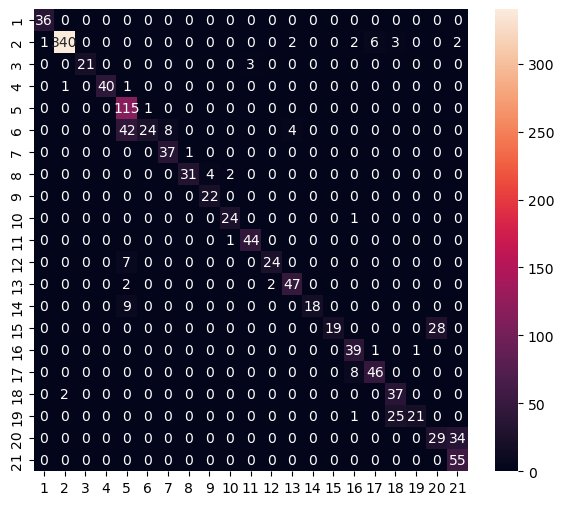

Classification Report
              precision    recall  f1-score   support

           1       0.97      1.00      0.99        36
           2       0.99      0.96      0.97       356
           3       1.00      0.88      0.93        24
           4       1.00      0.95      0.98        42
           5       0.65      0.99      0.79       116
           6       0.96      0.31      0.47        78
           7       0.82      0.97      0.89        38
           8       0.97      0.84      0.90        37
           9       0.85      1.00      0.92        22
          10       0.89      0.96      0.92        25
          11       0.94      0.98      0.96        45
          12       0.92      0.77      0.84        31
          13       0.89      0.92      0.90        51
          14       1.00      0.67      0.80        27
          15       1.00      0.40      0.58        47
          16       0.76      0.95      0.85        41
          17       0.87      0.85      0.86        54
     

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [94]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [95]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\hanas\AppData\Local\Temp\tmpng30csby\assets


INFO:tensorflow:Assets written to: C:\Users\hanas\AppData\Local\Temp\tmpng30csby\assets


Saved artifact at 'C:\Users\hanas\AppData\Local\Temp\tmpng30csby'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_5')
Output Type:
  TensorSpec(shape=(None, 22), dtype=tf.float32, name=None)
Captures:
  1945775699536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1945775701840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1945713109776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1945713100368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1945838060944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1945838061328: TensorSpec(shape=(), dtype=tf.resource, name=None)


7388

# 推論テスト

In [96]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\hanas\anaconda3\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [97]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [98]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [99]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 189 μs


In [100]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.8647671e-10 5.9607705e-06 6.6467708e-01 8.1395060e-02 4.7247326e-03
 9.3389931e-04 1.3087861e-03 2.6138430e-05 3.8344970e-05 1.1249011e-05
 5.5687889e-07 9.3329290e-06 5.6245299e-03 3.1371441e-02 4.6944252e-04
 1.4080260e-03 1.8952461e-04 4.8728871e-06 3.2051870e-05 1.8404112e-06
 4.4053979e-02 1.6371316e-01]
2
